# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [247]:
import numpy as np
import pandas as pd

data = pd.read_csv('Advertising 2.csv', index_col= 0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [249]:
X = data.drop(['sales'], axis=1)
X = np.array(X)
y = np.array(data['sales'])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [250]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [251]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм:**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
    $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
    $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
    
    или в векторном виде:
    
    $$\hat{y} = Xw$$
    $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [252]:
# размерность матрицы
n = X.shape[0]
m = X.shape[1]
N = 1000 # количество итераций
w = np.array(np.zeros(m)) # нулевой вектор
w = w.reshape(m,1)
w_hist = []
loss = []

i = 1
while i <= N:
    for k in range(m):
        h = X[:,0:k]@w[:k] + X[:,k+1:]@w[k+1:]
        w[k] = X[:,k].T@(y-h)
    w_hist.append(w)
    y_pred = X@w
    l = ((y-y_pred).T@(y-y_pred))/n
    loss.append(l)
    #print("Iteration i = ", i, ", w = ", w, ", Loss = ", l)
    i+= 1
print ("w = ", w, ", Loss = ",loss[-1])


w =  [[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]] , Loss =  [[2.78412631]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [253]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [81]:
X = data.drop(['sales'], axis=1)
X = np.array(X)
y = np.array(data['sales'])

X = (X-X.mean())/X.std()

**Добавим единичный столбец**

In [82]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [83]:
def mse_error(y, pred):
    s = ((y-pred)*(y-pred)).sum()
    return s/len(y)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [90]:
y_pred_naiv = np.array(np.ones(200))
y_pred_naiv = y_pred_naiv*y.mean()

mse_naiv = mse_error(y,y_pred_naiv)
mse_naiv

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [122]:
def lin_pred(X, w):
    return X@w
    

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [124]:
# считаем по формуле w-eta*x*(x*w-y)
def stoch_grad_step(X,y,w,train_ind, eta):
    step= X[train_ind]*(lin_pred(X[train_ind],w) - y[train_ind])
    return w -eta*step


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [155]:
def stochastic_gradient_descent(X,y,w,eta,max_iter,ev):
    distance = np.inf
    err = [] # список для фиксации ошибок
    i = 0
    np.random.seed(42)
    while (distance>ev) and (i<max_iter):
        train_ind = np.random.randint(X.shape[0])
        mse = mse_error(y,lin_pred(X,w))
        if err and mse > err[-1]:
            break
        err.append(mse)
        w_step = stoch_grad_step(X,y,w,train_ind,eta)
        w_new = w + w_step
        distance = np.linalg.norm(w-w_new)
        w = w_new
        i += 1
    return w, err
    
w = np.array(np.zeros(X.shape[1]))    
weight, errors = stochastic_gradient_descent(X,y,w,0.0001,10**5,0.0001)


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

Text(0.5, 1.0, 'Зависимость ошибки от номера итерации')

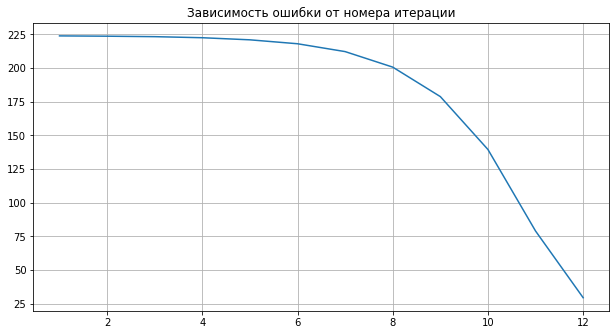

In [163]:
import matplotlib.pyplot as plt 
%matplotlib inline
fig = plt.figure(figsize=(8, 4)) 
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(range(1,len(errors)+1),errors)
axes.grid()
axes.set_title("Зависимость ошибки от номера итерации")

**Выведите вектор весов, к которому сошелся метод.**

In [148]:
print(weight)

[ 6.05818643 13.10679581 -4.02761836 -2.99608714]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [150]:
errors[-1]

29.424787646952907